In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt



In [2]:
# read the data
d1 = pd.read_csv('C:/Users/seeml/Desktop/summer_project/o1.csv',error_bad_lines = False, sep=",")
d2 = pd.read_csv('C:/Users/seeml/Desktop/summer_project/o2.csv',error_bad_lines = False, sep=",")

df = pd.concat([d1,d2],ignore_index=True)[660104:754775] #time interval of 29 dec 2015, 13:39:40 to 30 dec 2015, 15:57:30

In [3]:
df.index = range(len(df.index))## reindex the df.

In [4]:
#the function will give the number of connections for single ip pair in each 200 secs
def ll(df,j):
    l =[]
    for i in range(math.ceil(min(df['sec']/200)),math.ceil(max(df['sec'])/200)):
        s = (df['sec'] >= i*200) & (df['sec'] < (i+1)*200)
        d = df[s]
        v = d[['ip1','ip2','ip3','ip4','ip5']].sum(axis = 0)[j]
        l.append(v)
    return l

ip1 = ll(df,0)[:-1]
ip2 = ll(df,1)[:-1]
ip3 = ll(df,2)[:-1]
ip4 = ll(df,3)[:-1]
ip5 = ll(df,4)[:-1]


    

In [5]:
# get the total number of connections for all five ip pairs
total = []
for i in range(len(ip1)):
    a = ip1[i] + ip2[i] +ip3[i]+ip4[i]+ip5[i]
    total.append(a)



In [6]:
# get the time (x-axis)
def tt(df):
    l =[]
    for i in range(math.ceil(min(df['sec']/200)),math.ceil(max(df['sec'])/200)):
        s = (df['sec'] >= i*200) & (df['sec'] < (i+1)*200)
        d = df[s]
        v = math.ceil(d[['sec']].iloc[0]/200)
        l.append(v)
    return l
time = tt(df)[:-1]

In [7]:
# get the index of Tag value changes
Tag = df['Tag'].values.tolist()

index = np.where(np.roll(Tag,1) != Tag)[0]
# get the time of attack begins or stops
att_time = df['sec'][index]

## Time Series Plot

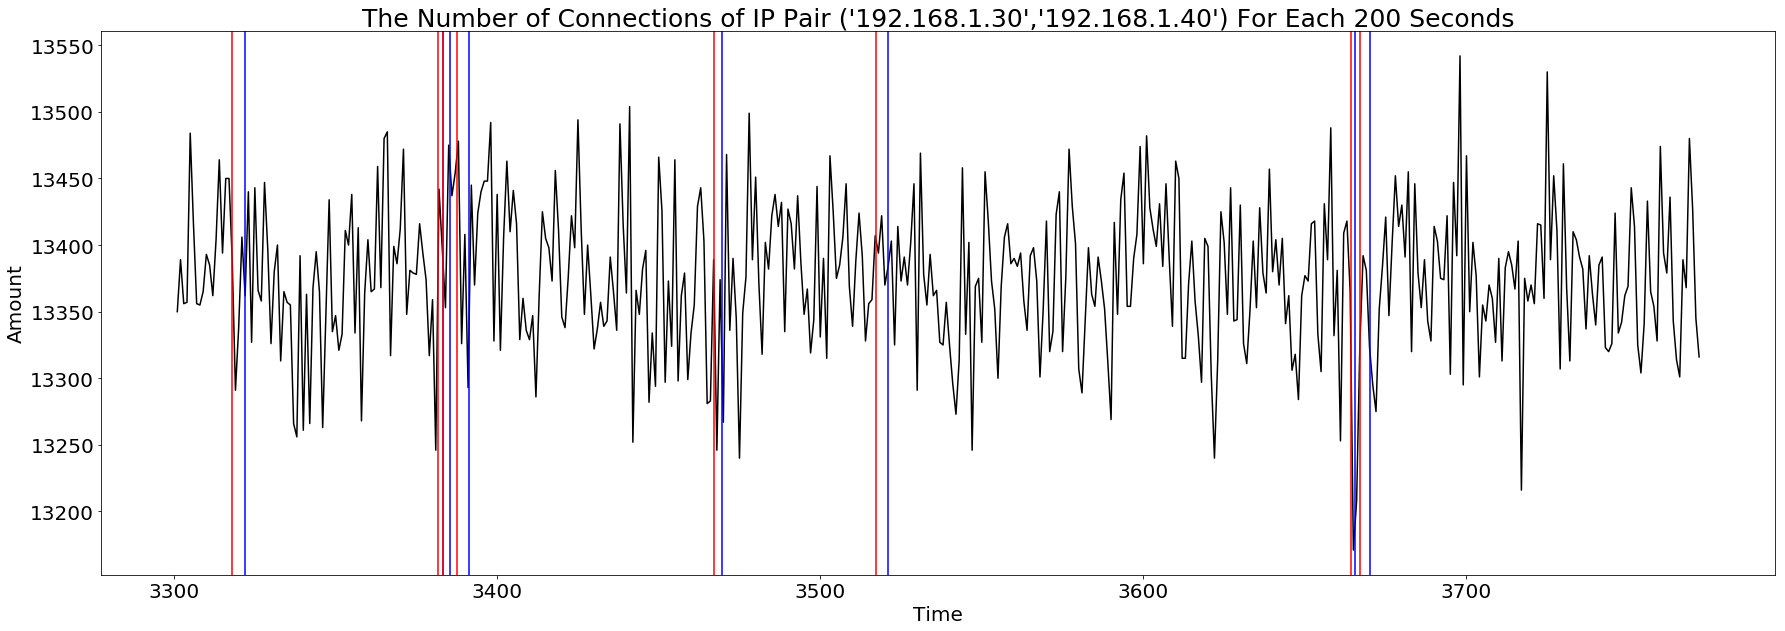

In [17]:
# Time Series plot for the number of connections of IP pair ('192.168.1.30','192.168.1.40')
plt.figure(figsize=(30,10))


f1 = plt.figure(1)
plt.plot(time,ip1,color = 'black')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amount', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Number of Connections of IP Pair ('192.168.1.30','192.168.1.40') For Each 200 Seconds",fontsize=25)
#red line means the start of the attack and yellow lines means the end of attack
for i in range(len(att_time)):
    if i%2 == 0:
        plt.axvline(x= (att_time.iloc[i]/200),color='r')
    else:
        plt.axvline(x= (att_time.iloc[i]/200),color='b')
        
plt.savefig("1.png")

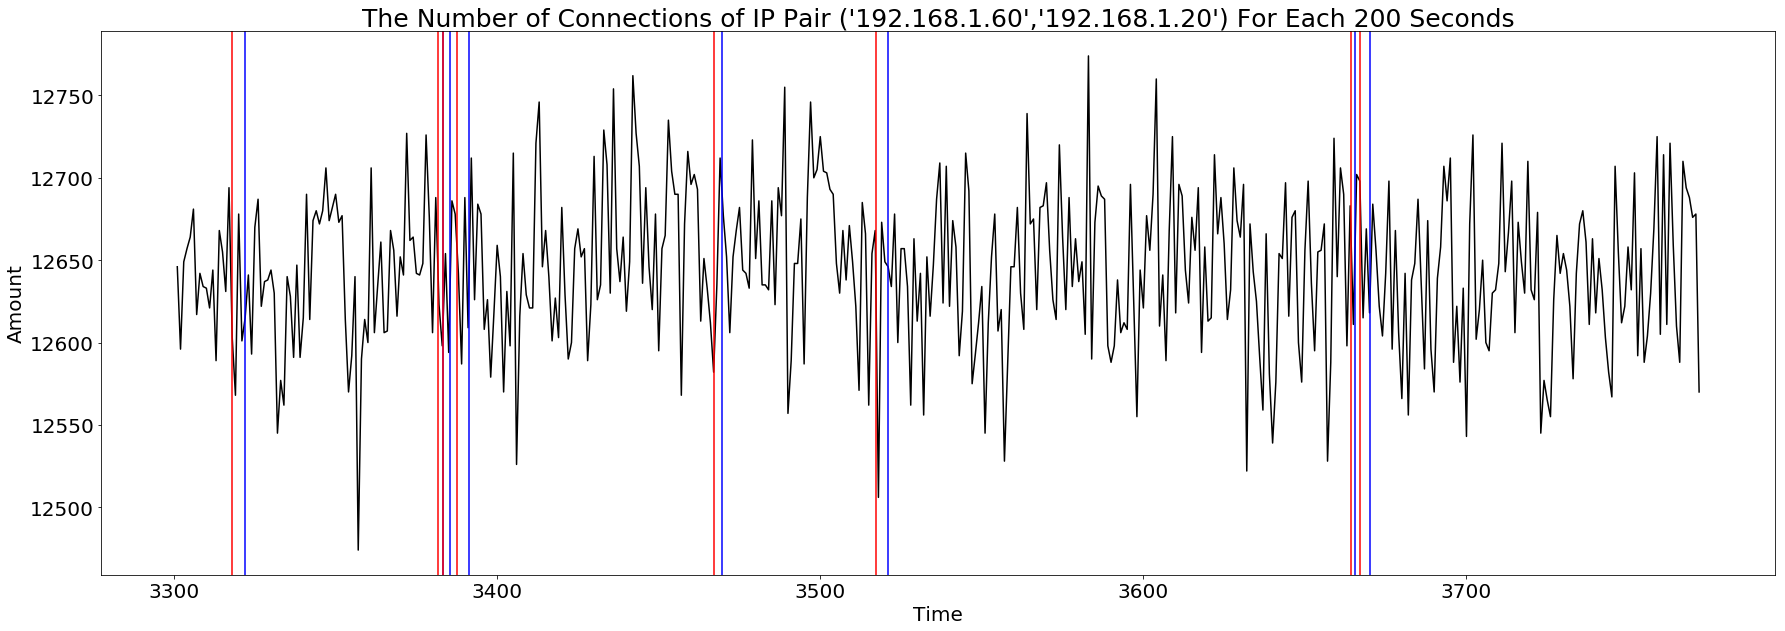

In [18]:
# Time Series plot for the number of connections of IP pair ('192.168.1.60','192.168.1.20')
plt.figure(figsize=(30,10))
f2 = plt.figure(1)
plt.plot(time,ip2,color = 'black')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amount', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Number of Connections of IP Pair ('192.168.1.60','192.168.1.20') For Each 200 Seconds",fontsize=25)
#red line means the start of the attack and yellow lines means the end of attack
for i in range(len(att_time)):
    if i%2 == 0:
        plt.axvline(x= (att_time.iloc[i]/200),color='r')
    else:
        plt.axvline(x= (att_time.iloc[i]/200),color='b')




plt.savefig("2.png")


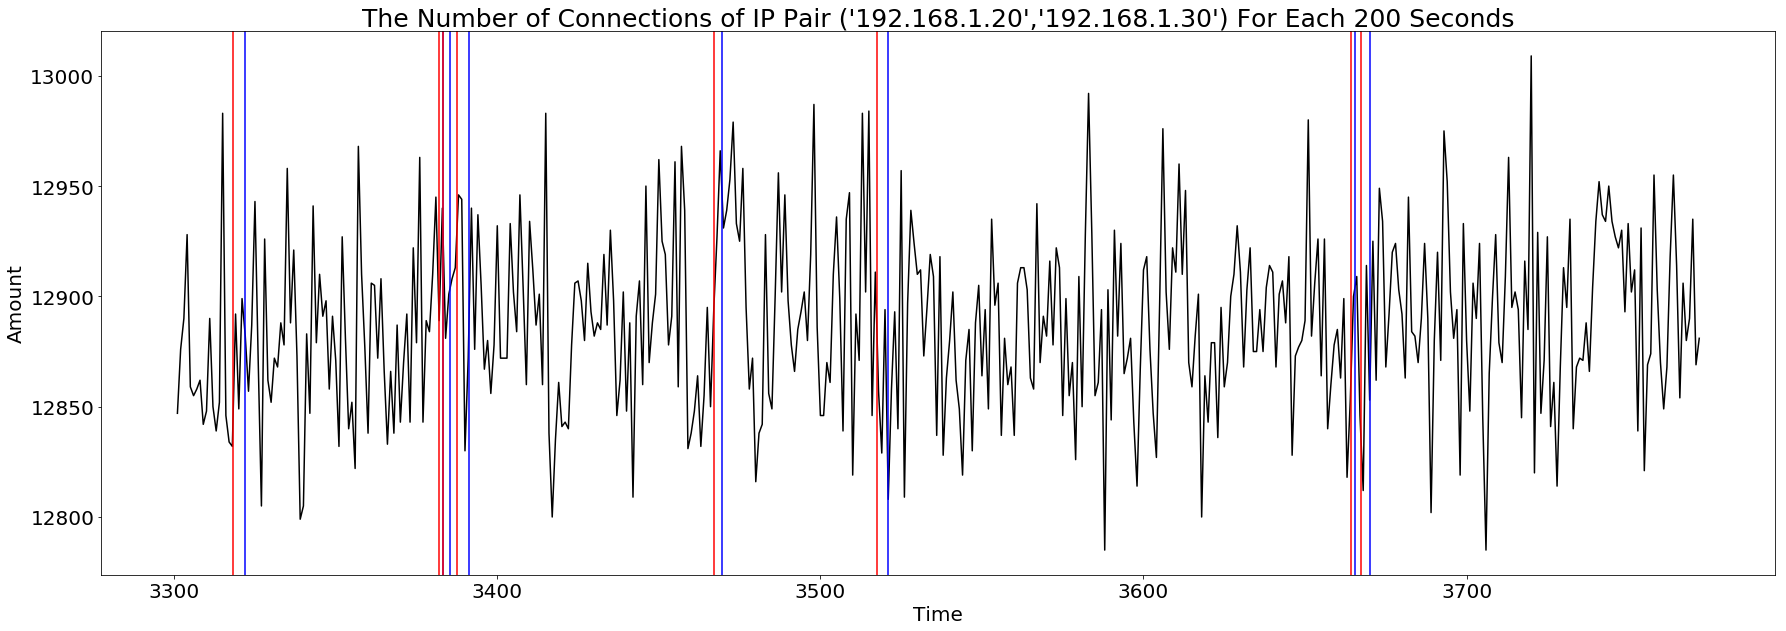

In [22]:
# Time Series plot for the number of connections of IP pair ('192.168.1.20','192.168.1.30')
plt.figure(figsize=(30,10))
f1 = plt.figure(1)
plt.plot(time,ip3,color = 'black')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amount', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Number of Connections of IP Pair ('192.168.1.20','192.168.1.30') For Each 200 Seconds",fontsize=25)
#red line means the start of the attack and yellow lines means the end of attack
for i in range(len(att_time)):
    if i%2 == 0:
        plt.axvline(x= (att_time.iloc[i]/200),color='r')
    else:
        plt.axvline(x= (att_time.iloc[i]/200),color='b')

plt.savefig("3.png")



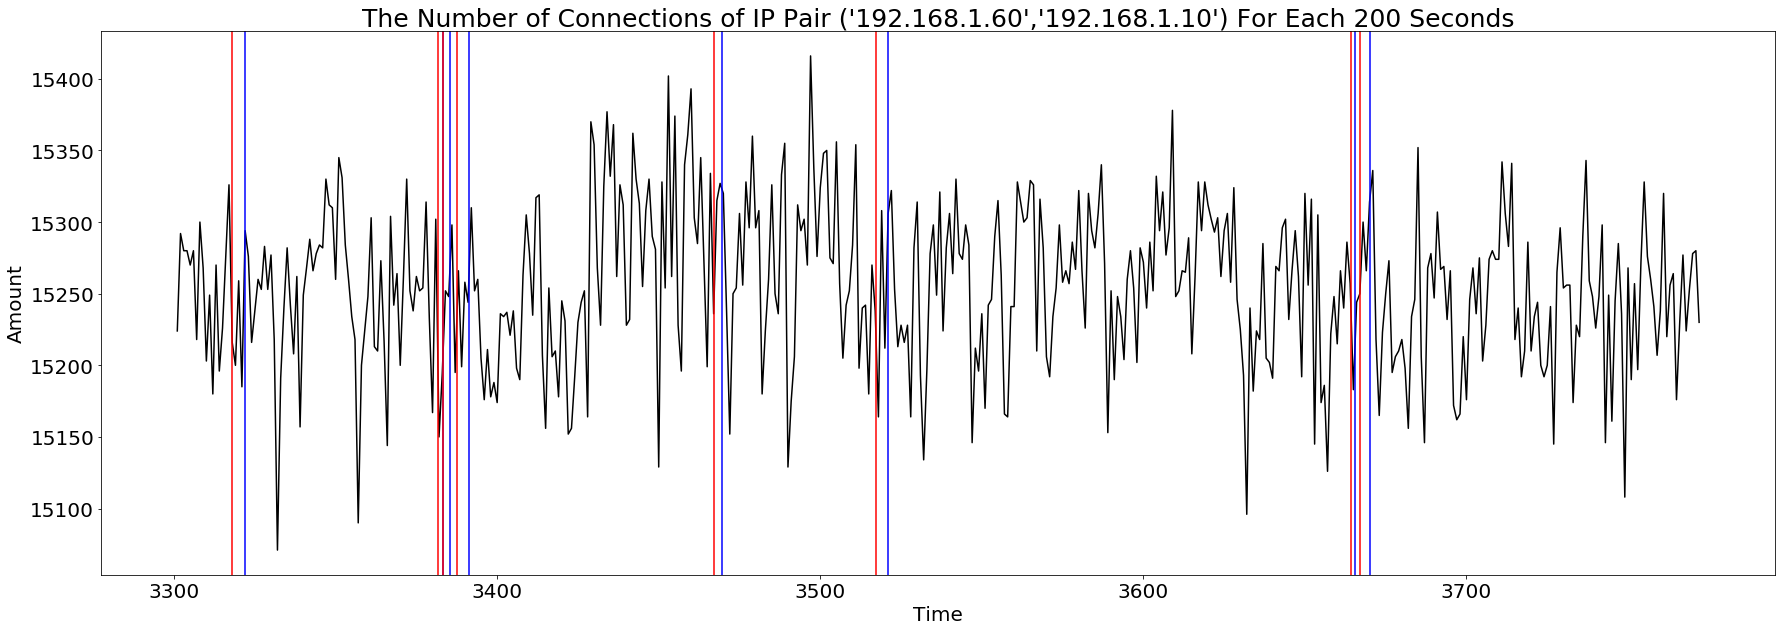

In [23]:
# Time Series plot for the number of connections of IP pair ('192.168.1.60','192.168.1.10')
plt.figure(figsize=(30,10))
f1 = plt.figure(1)
plt.plot(time,ip4,color = 'black')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amount', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Number of Connections of IP Pair ('192.168.1.60','192.168.1.10') For Each 200 Seconds",fontsize=25)
#red line means the start of the attack and yellow lines means the end of attack
for i in range(len(att_time)):
    if i%2 == 0:
        plt.axvline(x= (att_time.iloc[i]/200),color='r')
    else:
        plt.axvline(x= (att_time.iloc[i]/200),color='b')

plt.savefig("4.png")



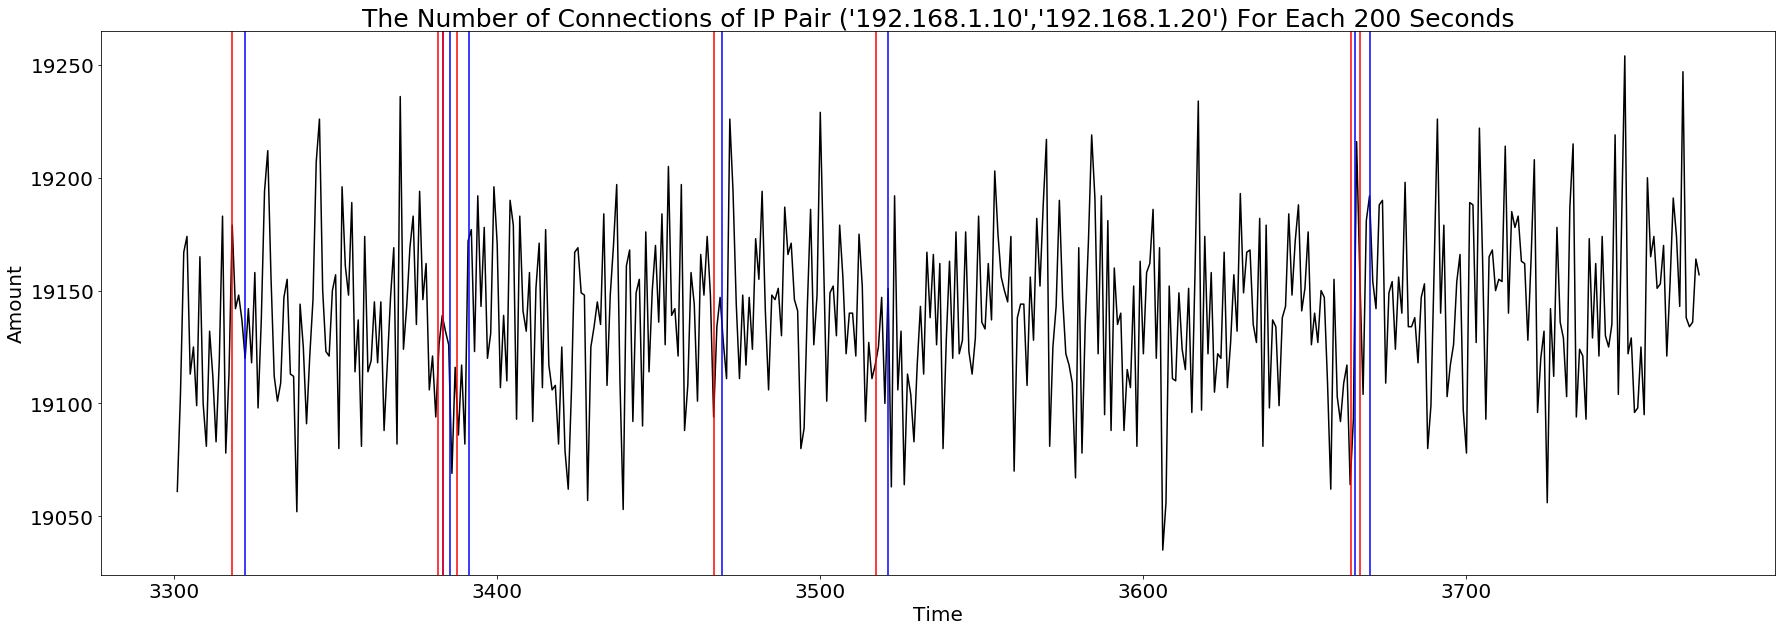

In [24]:
# Time Series plot for the number of connections of IP pair ('192.168.1.10','192.168.1.20')
plt.figure(figsize=(30,10))
f1 = plt.figure(1)
plt.plot(time,ip5,color = 'black')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amount', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Number of Connections of IP Pair ('192.168.1.10','192.168.1.20') For Each 200 Seconds",fontsize=25)
#red line means the start of the attack and yellow lines means the end of attack
for i in range(len(att_time)):
    if i%2 == 0:
        plt.axvline(x= (att_time.iloc[i]/200),color='r')
    else:
        plt.axvline(x= (att_time.iloc[i]/200),color='b')

plt.savefig("5.png")



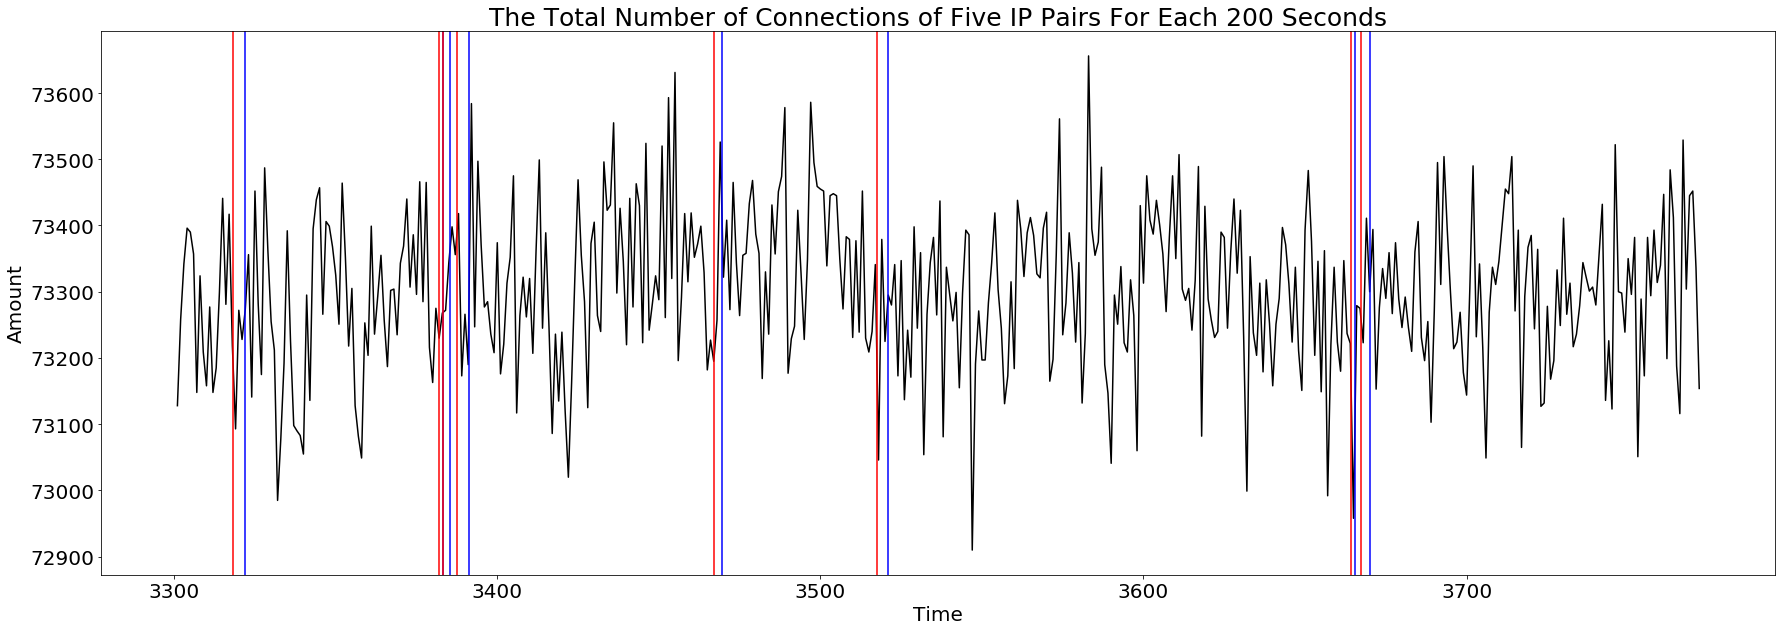

In [25]:
# Time Series plot for the number of connections of all five ip pairs
plt.figure(figsize=(30,10))
f = plt.figure(1)
plt.plot(time,total,color = 'black')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amount', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("The Total Number of Connections of Five IP Pairs For Each 200 Seconds",fontsize=25)
#red line means the start of the attack and yellow lines means the end of attack
for i in range(len(att_time)):
    if i%2 == 0:
        plt.axvline(x= (att_time.iloc[i]/200),color='r')
    else:
        plt.axvline(x= (att_time.iloc[i]/200),color='b')

plt.savefig("6.png")

## Matrix Profiles

In [26]:

from matrixprofile import *
from sklearn.preprocessing import StandardScaler

In [27]:
ar = np.array(total)
mean = np.mean(ar)# mean of the total number of connections of all five ip pairs per 200 secs
std =np.std(ar)# standard deviation of the total number of connections of all five ip pairs per 200 secs
new = list((ar - mean)/std)# standardization

In [28]:
a = min(df['sec']/200) # start time

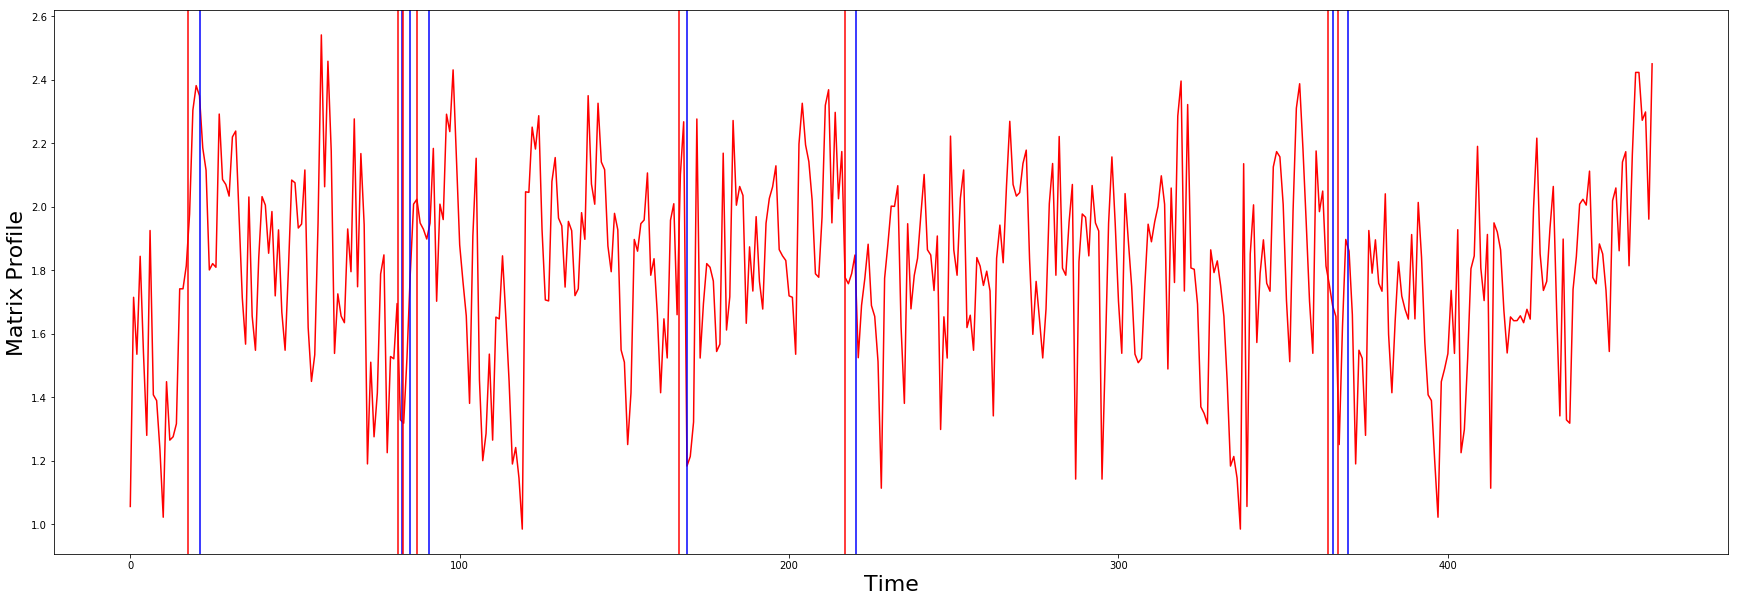

In [30]:
m = 10
mp = matrixProfile.stomp(new,m)

#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the Matrix Profile
fig, ax2 = plt.subplots(1,1,sharex=True,figsize=(30,10))
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Time', size=22)

for i in range(len(att_time)):
    if i%2 == 0:
        plt.axvline(x= (att_time.iloc[i]/200)-a,color='r')
    else:
        plt.axvline(x= (att_time.iloc[i]/200)-a,color='b')

plt.savefig("7.png")